In [15]:
from ipywidgets import widgets  
from IPython.display import display
from ipywidgets.widgets.interaction import interact, interactive
import Imp
plt = Imp.plt

In [2]:
Imp.plt.get_backend()

u'TkAgg'

# Logic of ipython notebook, %matplotlib inline & interact

In [64]:
%matplotlib inline
Imp.plt.get_backend()

'module://ipykernel.pylab.backend_inline'

3

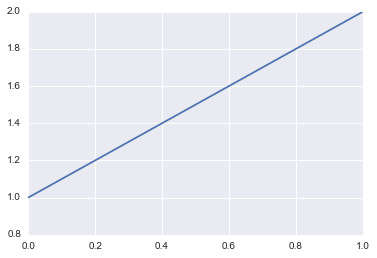

In [67]:
#the output of a cell is constructed by:
#* all the elements collected by display function
#* print "Out[xx]" + the value of last line of code, if the last line of code has no value, will not print "Out[xx]"
#* if we use %matplotlib inline and this cell generate a figure, call display(recent ploted figure)
display(3)
fig, ax = plt.subplots()  
ax.plot([1,2])

In [58]:
# run this cell, the output image should be generated by %display inline 
# after drag the slider, the image disappears. this is because interact redraw everything

t = Imp.np.arange(0.0, 1.0, 0.01)
fig, ax = plt.subplots()  
ax.plot(t, Imp.np.sin(2*Imp.np.pi * t*1))
def f(freq, x, y):   
    ax.plot(t, Imp.np.sin(2*Imp.np.pi * t*1))

interact(f, freq=(1, 10,0.1), x = 10, y=True)

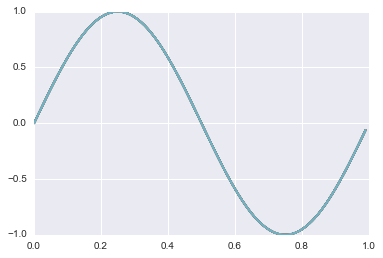

In [59]:
# run this cell, we will see two images. first generated by interact, 2nd generated by the %display inline
# after drag, the 2nd image disappears. this proves the code I see in interaction.py
# container.result = f(**container.kwargs)
#  if container.result is not None:
#     display(container.result)
t = Imp.np.arange(0.0, 1.0, 0.01)
fig, ax = plt.subplots()  
ax.plot(t, Imp.np.sin(2*Imp.np.pi * t*1))
def f(freq, x, y):   
    ax.plot(t, Imp.np.sin(2*Imp.np.pi * t*1))
    return fig

interact(f, freq=(1, 10,0.1), x = 10, y=True)

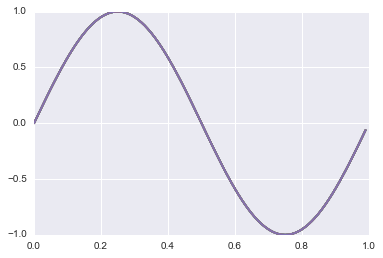

In [34]:
# same as above code.
# I am very confused. why the image generated by interact can be displayed after widgets. 
# from the code of interact(), the logic is 
#  w = interactive(f, **kwargs)
#  display(w)
# the reason is:  after display(w), then the f is called by callback.
# the callback is set inside interactive() code 
#  widget.on_trait_change(call_f, 'value')
#  container.on_displayed(lambda _: call_f(None, None, None))

t = Imp.np.arange(0.0, 1.0, 0.01)
fig, ax = plt.subplots()  
ax.plot(t, Imp.np.sin(2*Imp.np.pi * t*1))
def f(freq, x, y):   
    ax.plot(t, Imp.np.sin(2*Imp.np.pi * t*1))
    display(fig)

interact(f, freq=(1, 10,0.1), x = 10, y=True)

<function __main__.f>

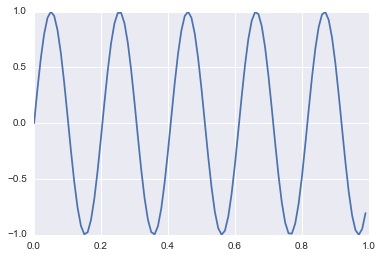

In [68]:
# below code works. this is because "%matplotlib inline" generate an implicit display
t = Imp.np.arange(0.0, 1.0, 0.01)

def f(freq, x, y):   
    Imp.plt.plot(t, Imp.np.sin(2*Imp.np.pi * t*freq))

interact(f, freq=(1, 10,0.1), x = 10, y=True)

# compare the plt.plot logic of %matplotlib inline and %matplotlib notebook

From below code, we can see that under %matplotlib mode, each Imp.plt.plot will generate a new figure
But under "%matplotlib notebook" model, Imp.plt.plot will modify previous figure

In [79]:
%matplotlib inline

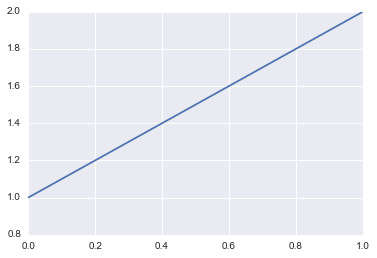

In [80]:
Imp.plt.plot([1,2])

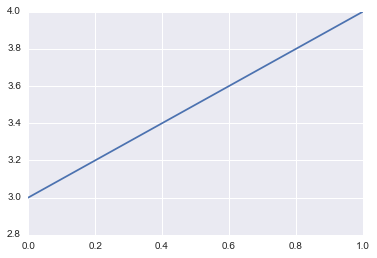

In [81]:
Imp.plt.plot([3,4])

In [82]:
%matplotlib notebook

<IPython.core.display.Javascript object>


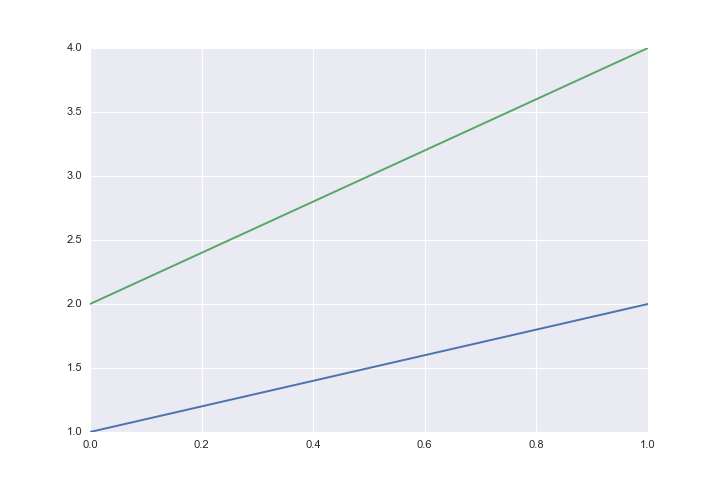

In [83]:
Imp.plt.plot([1,2])

In [84]:
Imp.plt.plot([2,4])

# logic of %matplotlib notebook

In [76]:
%matplotlib notebook

3

<IPython.core.display.Javascript object>


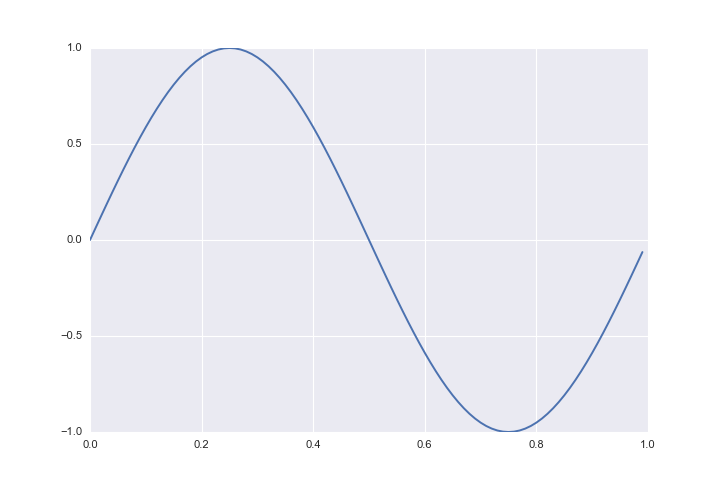

4

In [85]:
# with notebook, the plot figure is displayed before "Out[xx]".
# the output of a cell is constructed by:
# * all the elements collected by display function. if we use "%matplotlib notebook", plt.subplots() or plt.plot() automatically call display inside them
# * print "Out[xx]" + the value of last line of code, if the last line of code has no value, will not print "Out[xx]"
# * if we use %matplotlib inline and this cell generate a figure, call display(recent ploted figure)

t = Imp.np.arange(0.0, 1.0, 0.01)
display(3)
fig, ax = plt.subplots()  
display(4)
ax.plot(t, Imp.np.sin(2*Imp.np.pi * t*1))